In [5]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [8]:
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
model = GPT2LMHeadModel.from_pretrained("distilgpt2")

In [9]:
input_sentence = "May the force be with you."
tokens = tokenizer.tokenize(input_sentence)
token_ids = tokenizer.encode(input_sentence)

print(f"Input sentence: {input_sentence}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

Input sentence: May the force be with you.
Tokens: ['May', 'Ġthe', 'Ġforce', 'Ġbe', 'Ġwith', 'Ġyou', '.']
Token IDs: [6747, 262, 2700, 307, 351, 345, 13]


In [14]:
def get_top_n_predictions(model, tokenizer, input_ids, n=10):
    with torch.no_grad():
        outputs = model(input_ids)
        predictions = outputs.logits
    next_word_probabilities = predictions[0, -1, :]
    top_n_values, top_n_indices = torch.topk (next_word_probabilities, n)
    top_n_predictions = []
    for i in range(n):
        predicted_token = tokenizer.decode([top_n_indices[i]])
        top_n_predictions.append((predicted_token, top_n_values[i].item()))
    return top_n_predictions

In [ ]:
input_sentence = "May the force be"

for _ in range(0, 10):
    input_ids = tokenizer.encode(input_sentence, return_tensors="pt")
    top_predictions = get_top_n_predictions(model, tokenizer, input_ids, n=3)
    input_sentence = input_sentence + top_predictions[0][0]
    print(input_sentence)

    for token, probability in top_predictions:
        print(f'- "{token}": {probability:.4f}')

May the force be on
- " on": -64.0309
- " in": -64.0530
- "fitting": -64.3531
May the force be on the
- " the": -46.4960
- " its": -47.9148
- " a": -48.4800
May the force be on the right
- " right": -61.6658
- " side": -61.7417
- " ground": -61.7950
May the force be on the right side
- " side": -57.5233
- " track": -58.6298
- ".": -59.0986
May the force be on the right side of
- " of": -36.5692
- ".": -38.0388
- ",": -38.4764
May the force be on the right side of the
- " the": -45.2770
- " this": -47.7126
- " a": -47.7724
May the force be on the right side of the border
- " border": -50.3143
- " line": -50.3288
- " road": -50.4292
May the force be on the right side of the border.
- ".": -57.7002
- ",": -58.0834
- " and": -58.8902
May the force be on the right side of the border.�
- "�": -54.9925
- "
": -55.5651
- "<|endoftext|>": -56.4597
May the force be on the right side of the border.�

- "
": -41.7617
- "<|endoftext|>": -42.0991
- " The": -44.4527


In [20]:
import torch
import torch.nn.functional as F

word_embeddings = {
    "May": torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
    "the": torch.tensor([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
    "force": torch.tensor([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4]),
    "be": torch.tensor([0.2, 0.4, 0.6, 0.8, 1.0, 0.1, 0.3, 0.5, 0.7, 0.9]),
    "with": torch.tensor([0.9, 0.7, 0.5, 0.3, 0.1, 1.0, 0.8, 0.6, 0.4, 0.2]),
    "you": torch.tensor([0.3, 0.1, 0.9, 0.7, 0.5, 0.2, 1.0, 0.8, 0.6, 0.4])
}

input_sentence = ["May", "the", "force", "be", "with", "you"]
input_embeddings = torch.stack([word_embeddings[word] for word in input_sentence])
print("Input embeddings:\n", input_embeddings)

Input embeddings:
 tensor([[0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
         1.0000],
        [1.0000, 0.9000, 0.8000, 0.7000, 0.6000, 0.5000, 0.4000, 0.3000, 0.2000,
         0.1000],
        [0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 0.1000, 0.2000, 0.3000,
         0.4000],
        [0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 0.1000, 0.3000, 0.5000, 0.7000,
         0.9000],
        [0.9000, 0.7000, 0.5000, 0.3000, 0.1000, 1.0000, 0.8000, 0.6000, 0.4000,
         0.2000],
        [0.3000, 0.1000, 0.9000, 0.7000, 0.5000, 0.2000, 1.0000, 0.8000, 0.6000,
         0.4000]])


In [23]:
query = input_embeddings
key = input_embeddings
value = input_embeddings

In [21]:
def calculate_attention(query, key, value, mask=None):
    scores = torch.matmul(query, key.transpose(-2, -1))
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    attention_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attention_weights, value)
    return output, attention_weights

In [24]:
context_vectors, attention_matrix = calculate_attention(query, key, value)

print("Context vectors:", context_vectors)
print("Attention weights:", attention_matrix)

Context vectors: tensor([[0.3463, 0.3632, 0.5661, 0.5830, 0.5999, 0.5073, 0.6081, 0.6251, 0.6420,
         0.6589],
        [0.6567, 0.6127, 0.6820, 0.6381, 0.5941, 0.6257, 0.4886, 0.4447, 0.4007,
         0.3567],
        [0.5510, 0.5572, 0.6599, 0.6661, 0.6723, 0.6456, 0.4277, 0.4339, 0.4401,
         0.4463],
        [0.3734, 0.4150, 0.6252, 0.6668, 0.7084, 0.4462, 0.5038, 0.5454, 0.5870,
         0.6286],
        [0.6475, 0.5713, 0.6231, 0.5470, 0.4709, 0.6910, 0.6014, 0.5253, 0.4492,
         0.3731],
        [0.4178, 0.3792, 0.6643, 0.6257, 0.5872, 0.4614, 0.6490, 0.6104, 0.5718,
         0.5333]])
Attention weights: tensor([[0.3388, 0.0651, 0.1020, 0.1955, 0.1128, 0.1859],
        [0.0622, 0.3237, 0.2064, 0.1077, 0.1867, 0.1133],
        [0.0966, 0.2044, 0.3206, 0.1515, 0.1304, 0.0966],
        [0.1863, 0.1075, 0.1526, 0.3230, 0.0620, 0.1686],
        [0.1157, 0.2006, 0.1414, 0.0668, 0.3477, 0.1279],
        [0.1776, 0.1133, 0.0975, 0.1690, 0.1191, 0.3236]])


In [25]:
def cosine_similarity(vector1, vector2):
    return F.cosine_similarity(vector1.unsqueeze(0), vector2.unsqueeze(0)).item()

In [27]:
def compare_vectors(context_vectors, attention_matrix, word_list, word_index):
    """Compares the context vector of a word with the context vectors of the other words,
       taking into account the attention weights."""

    results = {}

    for other_word_index in range(len(context_vectors)):
        if word_index != other_word_index:
            similarity = cosine_similarity(
                context_vectors[word_index], 
                context_vectors[other_word_index])
            results[word_list[other_word_index]] = {
                "Similarity": similarity,
                "Attention weight": attention_matrix[word_index, other_word_index].item()
            }
    return results

In [29]:
# Input sentence
input_sentence = "May the force be with you"
word_list = input_sentence.split()

# Example call
results_may = compare_vectors(context_vectors, attention_matrix, word_list, 0)
results_the = compare_vectors(context_vectors, attention_matrix, word_list, 1)

# Output of results with tabbing
print(f"Comparison for 'May':")
print("  Word\t\tSimilarity\tAttention weight")
for word, data in results_may.items():
    print(f"  {word}\t\t{data['Similarity']:.4f}\t\t{data['Attention weight']:.4f}")

print(f"\nComparison for 'the':")
print("  Word\t\tSimilarity\tAttention weight")
for word, data in results_the.items():
    print(f"  {word}\t\t{data['Similarity']:.4f}\t\t{data['Attention weight']:.4f}")

Comparison for 'May':
  Word		Similarity	Attention weight
  the		0.9387		0.0651
  force		0.9561		0.1020
  be		0.9919		0.1955
  with		0.9491		0.1128
  you		0.9933		0.1859

Comparison for 'the':
  Word		Similarity	Attention weight
  May		0.9387		0.0622
  force		0.9944		0.2064
  be		0.9542		0.1077
  with		0.9913		0.1867
  you		0.9596		0.1133


#### 1. Initializing the weighting matrices for each head

In [2]:
%pip install seaborn pandas

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.0/11.0 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/11.0 MB 655.4 kB/s eta 0:00:17
   - -------------------------------------- 0.4/11.0 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/11.0 MB 3.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/11.0 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 6.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn.functional as F
import numpy as np
torch.manual_seed(42)  # You can replace 42 with any integer of your choice
# Example embeddings (6 words, 10 dimensions)
word_embeddings = {
    "May": torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
    
"the": torch.tensor([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
    "force": torch.tensor([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4]),
    "be": torch.tensor([0.2, 0.4, 0.6, 0.8, 1.0, 0.1, 0.3, 0.5, 0.7, 0.9]),
    "with": torch.tensor([0.9, 0.7, 0.5, 0.3, 0.1, 1.0, 0.8, 0.6, 0.4, 0.2]),
    "you": torch.tensor([0.3, 0.1, 0.9, 0.7, 0.5, 0.2, 1.0, 0.8, 0.6, 0.4])
}
input_sentence_list = ["May", "the", "force", "be", "with", "you"]
input_embeddings = torch.stack([word_embeddings[word] for word in input_sentence_list])
d_model = input_embeddings.shape[1] # Dimension of input embeddings (here 10)
num_heads = 2                       # Number of attention heads
d_k = d_model // num_heads          # Dimension of the Q, K, V vectors per head (here 5)
W_Q = torch.randn(num_heads, d_model, d_k) # (heads, d_model, d_k)
W_K = torch.randn(num_heads, d_model, d_k)
W_V = torch.randn(num_heads, d_model, d_k)
W_O = torch.randn(d_model, d_model)        # Final projection matrix

In [4]:
def multi_head_attention(input_embeddings, W_Q, W_K, W_V, W_O, num_heads, d_k, mask=None):
    # input_embeddings is expected here with batch dimension: (batch_size, seq_len, d_model)
    batch_size, seq_len, d_model = input_embeddings.shape

    heads_output = []
    attention_matrices = []

    for i in range(num_heads):
    # Project for the current head
    # (batch_size, seq_len, d_model) @ (d_model, d_k) -> (batch_size, seq_len, d_k)
        Q_i = torch.matmul(input_embeddings, W_Q[i])
        K_i = torch.matmul(input_embeddings, W_K[i])
        V_i = torch.matmul(input_embeddings, W_V[i])

        # 2. Calculate scaled dot product attention for head_i
        # scores: (batch_size, seq_len, seq_len)
        scores = torch.matmul(Q_i, K_i.transpose(-2, -1)) / (d_k ** 0.5)
        
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        attention_weights_i = F.softmax(scores, dim=-1)
                    
        # head_i: (batch_size, seq_len, d_k)
        head_i = torch.matmul(attention_weights_i, V_i)

        heads_output.append(head_i)
        attention_matrices.append(attention_weights_i)

    # 3. Concatenation of head outputs
    # heads_output is a list of (batch_size, seq_len, d_k) tensors
    # concated_heads: (batch_size, seq_len, num_heads * d_k) = (batch_size, seq_len, d_model)
    concated_heads = torch.cat(heads_output, dim=-1)
    
    # 4. Final linear projection
    # output: (batch_size, seq_len, d_model) @ (d_model, d_model) -> (batch_size, seq_len, d_model)
    output = torch.matmul(concated_heads, W_O)

    return output, attention_matrices


Output of the multi-head attention layer (context vectors):
 tensor([[-6.3872,  1.9858,  2.1712,  2.7969, -2.1122, -5.8285, -3.3943, -1.7054,
         -2.6450,  3.8029],
        [-6.0595,  2.2669,  2.7205,  3.5506, -2.4773, -6.7691, -3.6894, -2.3192,
         -2.7402,  5.1961],
        [-4.6440,  1.6299,  3.9077,  5.0117, -1.8828, -6.0060, -3.2956, -3.3168,
         -2.5437,  4.9490],
        [-5.7771,  2.0586,  2.5875,  3.0803, -1.6768, -5.7386, -3.5614, -2.2284,
         -2.6754,  4.2769],
        [-6.4755,  2.3926,  2.5579,  3.2462, -2.8572, -6.9736, -3.5434, -1.9716,
         -2.7969,  5.1418],
        [-6.8217,  3.0510,  3.1547,  2.3845, -1.8317, -6.1681, -2.8469, -1.6187,
         -2.7340,  4.0441]])

Number of attention matrices (corresponds to num_heads): 2

--- Visualization of attention matrices ---


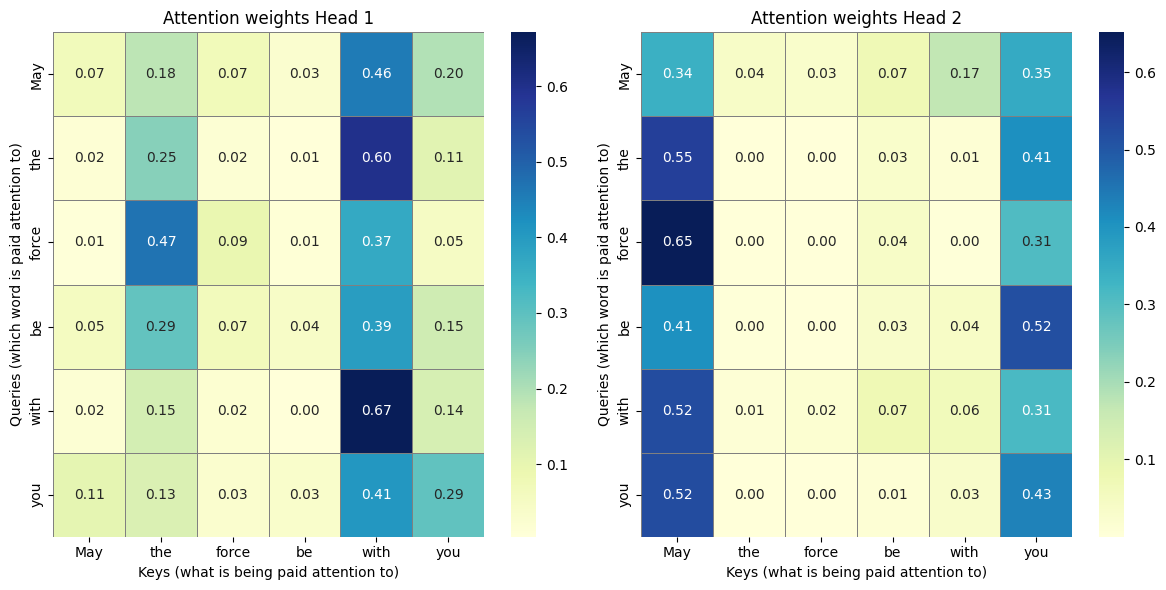

In [5]:
# Call the multi-head attention function
input_embeddings_batched = input_embeddings.unsqueeze(0)

output_mha, attention_matrices_mha = multi_head_attention(
    input_embeddings_batched, W_Q, W_K, W_V, W_O, num_heads, d_k
)

print("\nOutput of the multi-head attention layer (context vectors):\n", output_mha.squeeze(0)) # squeeze(0) removes the batch dimension
print(f"\nNumber of attention matrices (corresponds to num_heads): {len(attention_matrices_mha)}")

print("\n--- Visualization of attention matrices ---")
plt.figure(figsize=(num_heads * 6, 6)) # Dynamically adjusts the figure size to the number of heads

for i, attn_matrix in enumerate(attention_matrices_mha):
    plt.subplot (1, num_heads, i + 1)
    # CORRECTED: squeeze(0) to remove the batch dimension
    df_attn = pd.DataFrame(attn_matrix.squeeze(0).detach().numpy(), index=input_sentence_list, columns=input_sentence_list)
        
    sns.heatmap(df_attn, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, linecolor="gray")
    plt.title(f"Attention weights Head {i+1}")
    plt.xlabel("Keys (what is being paid attention to)")
    plt.ylabel("Queries (which word is paid attention to)")

plt.tight_layout()
plt.show()

In [ ]:
print(pd.DataFrame(attention_matrices_mha[0].squeeze(0).detach().numpy(), index=input_sentence_list, columns=input_sentence_list))

            May       the     force        be      with       you
May    0.068118  0.181340  0.071635  0.027055  0.456570  0.195282
the    0.015012  0.246116  0.019410  0.006160  0.599809  0.113493
force  0.007348  0.470308  0.094195  0.009372  0.368718  0.050059
be     0.054408  0.292597  0.065859  0.040474  0.393329  0.153334
with   0.018118  0.147041  0.020352  0.003969  0.671181  0.139338
you    0.106796  0.130137  0.028468  0.034135  0.407147  0.293317


In [7]:
print(pd.DataFrame(attention_matrices_mha[1].squeeze(0).detach().numpy(), index=input_sentence_list, columns=input_sentence_list))

            May       the     force        be      with       you
May    0.339671  0.036311  0.029780  0.072609  0.169864  0.351766
the    0.549202  0.000667  0.000758  0.028736  0.012748  0.407889
force  0.651215  0.000264  0.000342  0.038280  0.004499  0.305399
be     0.405897  0.003060  0.001443  0.031975  0.038848  0.518777
with   0.521837  0.008986  0.017760  0.074093  0.063290  0.314033
you    0.522649  0.000785  0.000491  0.012670  0.032367  0.431039
